##### Name - Shunottara Alhat

# Assignment 13 KNN - Q2 - Implement a KNN model to classify the animals in to categorie (ZOO)

##### Import Libraries

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

##### Import Data 

In [2]:
Zoo = pd.read_csv("Zoo.csv")
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


### Exploratory Data Analysis 

In [3]:
# Info
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
# Descriptive 

Zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
# Missing Value

Zoo.isnull()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
Zoo.isnull().values.any()

False

In [7]:
# Duplicate

Zoo.duplicated().sum()

0

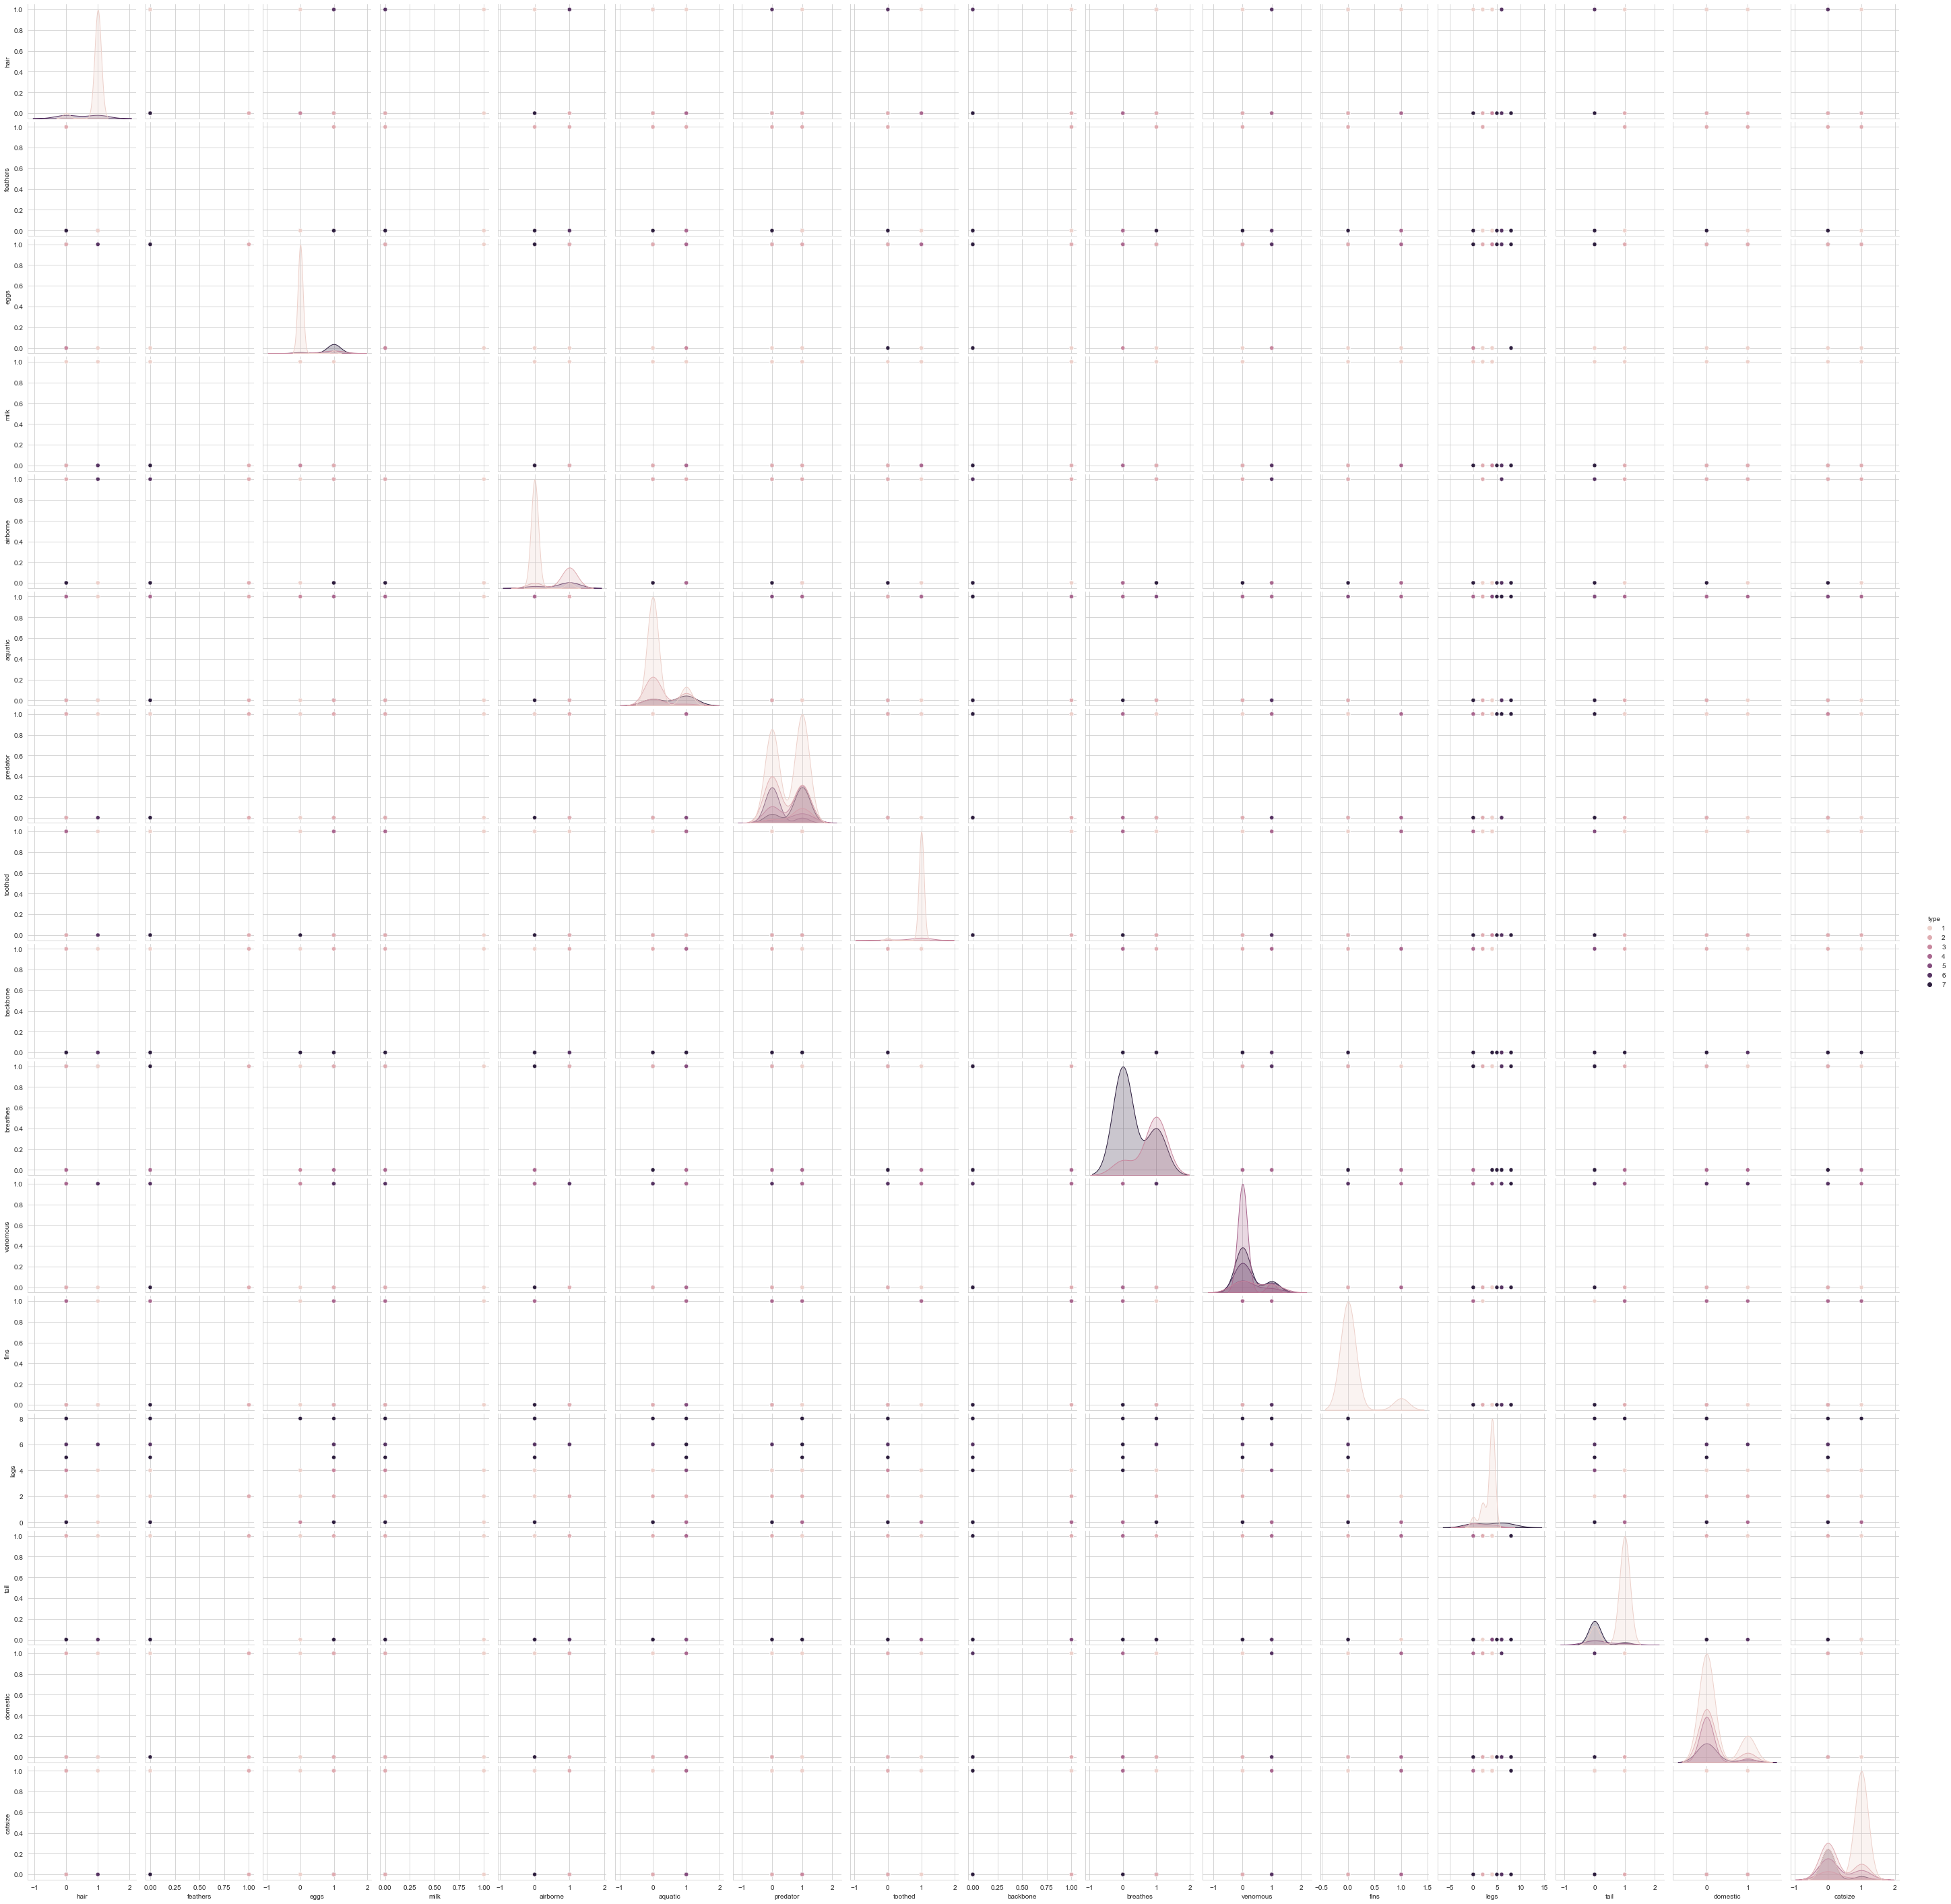

In [8]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(Zoo, hue = "type");
plt.show()

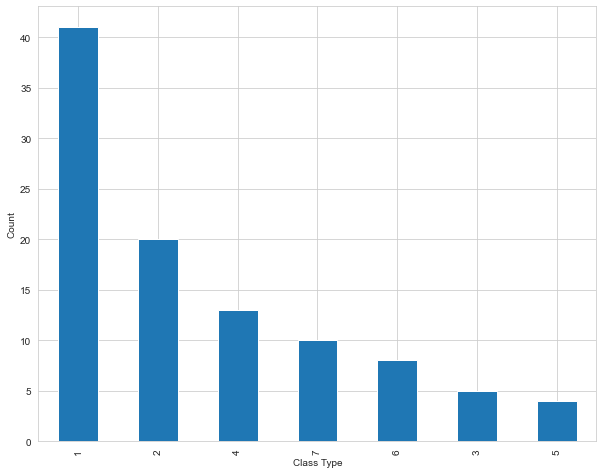

In [9]:

plt.figure(figsize=(10,8));
Zoo.type.value_counts().plot(kind="bar");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

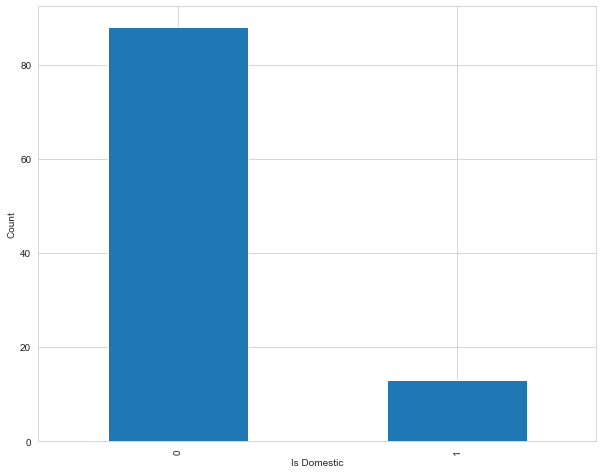

In [10]:
plt.figure(figsize=(10,8));
Zoo.domestic.value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot();

In [11]:
pd.crosstab(Zoo.type, Zoo.domestic)

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


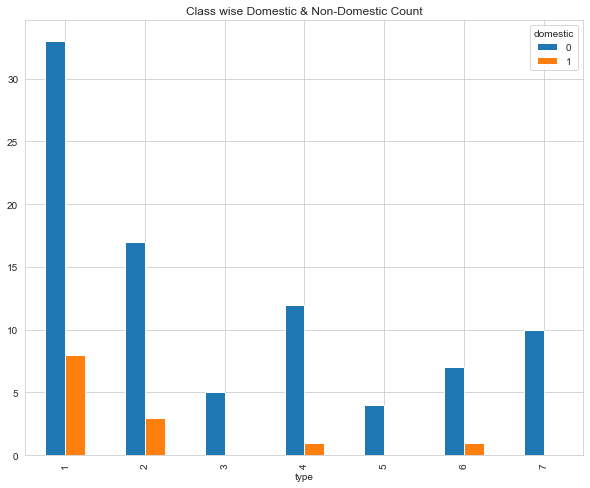

In [12]:
pd.crosstab(Zoo.type, Zoo.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [13]:
# Lets see how many animals provides us milk
Zoo.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

In [14]:
# So there are 41 animals in the list which provides us milk. Lets see to which category they belongs
pd.crosstab(Zoo.type, Zoo.milk)

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


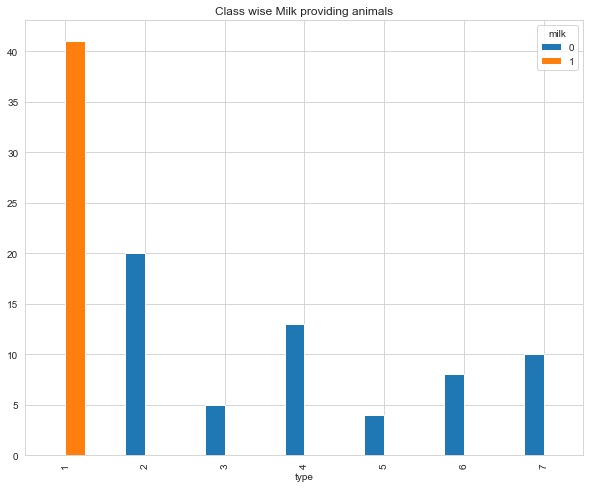

In [15]:
pd.crosstab(Zoo.type, Zoo.milk).plot(kind="bar", title="Class wise Milk providing animals", figsize=(10, 8));


In [16]:
Zoo[(Zoo.milk==1)].shape[0]

41

In [17]:
Zoo[Zoo.type == 1].shape[0]

41

In [18]:
# lets find out all the aquatic animals.
Zoo.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [19]:
Zoo[Zoo.aquatic==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

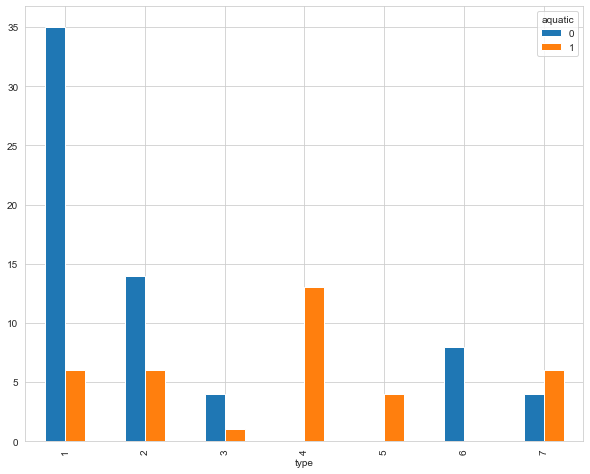

In [20]:
# Lets plot category wise animals having fins
pd.crosstab(Zoo.type, Zoo.aquatic).plot(kind="bar", figsize=(10, 8));

In [21]:
Zoo.venomous.value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [22]:
pd.crosstab(Zoo.type, Zoo.venomous)

venomous,0,1
type,,
1,41,0
2,20,0
3,3,2
4,12,1
5,3,1
6,6,2
7,8,2


<AxesSubplot:xlabel='type'>

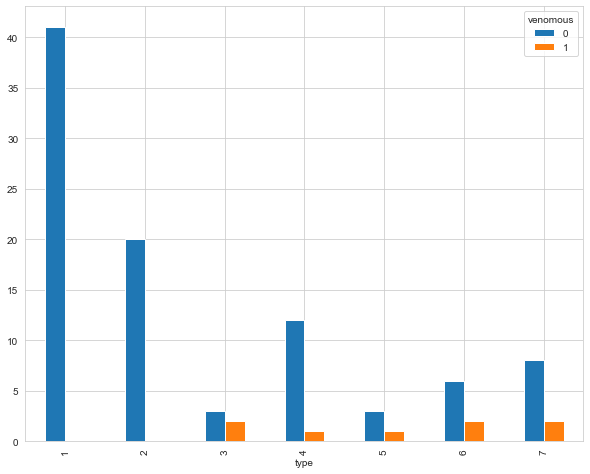

In [23]:
pd.crosstab(Zoo.type, Zoo.venomous).plot(kind="bar", figsize=(10, 8))

### Create Feature & Target Matrix¶

In [24]:
Zoo.shape

(101, 18)

In [25]:
X = Zoo.loc[:, ["milk", "backbone", "toothed", "venomous", "domestic", "aquatic"]].values

In [26]:
y = Zoo.iloc[:, 17].values

In [27]:
y.shape

(101,)

In [28]:
X.shape

(101, 6)

### Split Data Into Train & Test Set¶ 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [30]:
X_train

array([[1, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 1, 1, 1, 0, 1],
       [0, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 0, 1],
 

In [31]:
y_train

array([1, 2, 4, 3, 4, 3, 3, 1, 6, 1, 4, 2, 1, 1, 1, 4, 6, 2, 1, 7, 1, 6,
       4, 1, 4, 2, 1, 4, 1, 1, 2, 1, 2, 5, 1, 1, 1, 2, 2, 7, 1, 1, 7, 3,
       1, 1, 1, 1, 7, 1, 2, 2, 7, 7, 5, 2, 7, 7, 6, 1, 2, 4, 5, 6, 1, 2,
       1, 2, 2, 1, 6, 1, 1, 1, 1], dtype=int64)

# KNN Model

### Create Classifier 

In [32]:
Clf = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2) 

In [33]:
Clf

KNeighborsClassifier()

### Train Model 

In [34]:
Clf.fit(X_train, y_train)

KNeighborsClassifier()

### Predict Data 

In [35]:
y_pred = Clf.predict(X_test)

In [36]:
y_pred

array([4, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 6, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1], dtype=int64)

### Model Evaluation 
##### Accuracy

In [37]:
print("Accuracy of KNN Regression:",accuracy_score(y_test, y_pred))

Accuracy of KNN Regression: 0.9230769230769231


### Compare with Logistic Regression Classifier 

In [38]:
Clf_log = LogisticRegression(random_state=0)
Clf_log

LogisticRegression(random_state=0)

In [39]:
Clf_log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [40]:
y_pred_log = Clf_log.predict(X_test)
y_pred_log

array([4, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 6, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1], dtype=int64)

In [41]:
print("Accuracy of Logistic Regression Classifier:",accuracy_score(y_test, y_pred_log))

Accuracy of Logistic Regression Classifier: 0.9230769230769231
